In [1]:
import anndata
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import os
import math
import pickle
import seaborn as sns
import scipy
import sys
import scanpy as sc
import pandas as pd

from scbasset.utils import *

### path to input data

In [2]:
trained_model = '../../data/downloads/pbmc_model.h5'
motif_fasta_folder = '../../data/downloads/Homo_sapiens_motif_fasta'
rna_data = '../../data/multiome_pbmc/ad_rna_annotate.h5ad'

### load the data and trained model

In [3]:
# read the cell annotations based on scRNA
ad = anndata.read_h5ad(rna_data)
sc.pp.normalize_total(ad, target_sum=1e6)
sc.pp.log1p(ad)

# load model
model = make_model(32, ad.shape[0], show_summary=False)
model.load_weights(trained_model)

2022-10-10 13:19:49.688023: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-10 13:19:52.933089: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10410 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1


### score a TF of interest

In [4]:
scores = motif_score('PAX5', model, motif_fasta_folder=motif_fasta_folder)
ad.obs['PAX5_activity'] = scores

2022-10-10 13:20:01.192280: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400
2022-10-10 13:20:04.894833: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


### plot cell annotation (left), TF expression (mid) and TF activity (right)

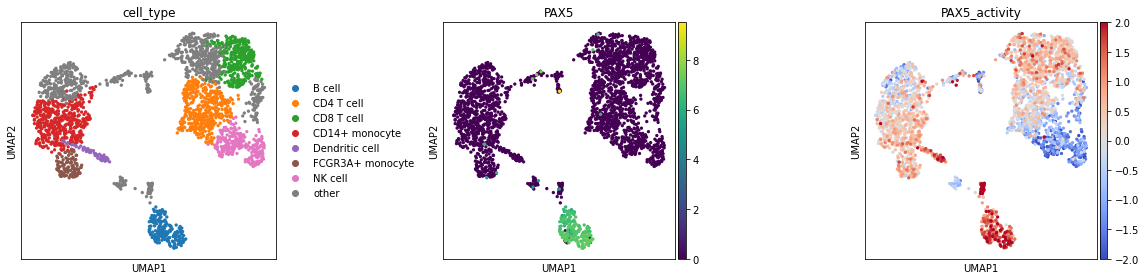

In [8]:
f, axs = plt.subplots(ncols=3, figsize=(16, 4))
sc.pl.umap(ad, color='cell_type', ax=axs[0], show=False)
sc.pl.umap(ad, color='PAX5', ax=axs[1], show=False)
sc.pl.umap(ad, color='PAX5_activity', ax=axs[2], cmap='coolwarm', vmin=-2, vmax=2,show=False)
f.tight_layout()